# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

Методика исследования: 
 - группируем заемщиков по интересующему признаку (количеству детей, уровню дохода, семейному положению и т.д.)
 - определяем долю групп в общем количестве заемщииков
 - определяем общее количество займов и процент просроченных займов в группах
 - определяем разницу между максимальным и минимальным процентом просроченных займов в группах    
 - оцениваем, как соответствие заемщика интересующему признаку влияет на возврат кредита в срок

Создадим функцию, которая поможет собрать данные и подготовиить их к визуализации.

In [22]:
#ПАРАМЕТРЫ: 
# data - DataFrame с исходными данными, 
# col_to_groupby - строка с названием колонки для группировки заемщиков,
# col_to_groupby_alias - строка с названием колонки групп заемщиков для визуализации в форме таблицы
#ВОЗВРАЩАЕТ: DataFrame для визуализации с данными о
# группе заемщиков (колонка col_to_groupby_alias),
# количеством займов в группе (колонка 'Займов(шт)')
# процент просроченных займов в группе (колонка 'Просрочено(%)')
def prepare_dataset(data, col_to_groupby, col_to_groupby_alias):
    #группируем заемщиков по col_to_groupby, считаем общее количество займов и количество просроченных займов в группах
    data_grouped = data.groupby(col_to_groupby)['debt'].agg(['count', 'sum'])
    #считаем процент просроченных займов с точностью до 2 знаков после запятой и записываем данные в новый столбец 'ratio' 
    data_grouped['ratio'] = round(data_grouped['sum'] / data_grouped['count'] * 100, 2) 
    #сортируем DataFrame по возрастанию значений колонки ratio, индексируем
    data_grouped = data_grouped.sort_values('ratio')
    data_grouped = data_grouped.reset_index()
    #удаляем лишние колонки и переименовываем оставшиеся, чтобы облегчить восприятие табличных данных и построить диаграммы 
    data_grouped = data_grouped.loc[:, [col_to_groupby, 'count', 'ratio']]
    aliases = {col_to_groupby : col_to_groupby_alias, 'count' : 'Займов(шт)', 'ratio' : 'Просрочено(%)'}
    data_grouped = data_grouped.rename(columns=aliases) 
    return data_grouped    

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Визуализируем данные о заемщиках в форме таблицы.

In [23]:
debt_by_children = prepare_dataset(data, 'children', 'Детей(чел)')
debt_by_children

,Детей(чел),Займов(шт),Просрочено(%)
0,5,9,0.00
1,0,14091,7.54
2,3,330,8.18
3,1,4808,9.23
4,2,2052,9.45
5,4,41,9.76


Количество наблюдений в группах заемщиков с 4 и 5 детьми (41 и 9 соответственно) мало, общая доля этих групп не превышает 1%. Вероятно, собрав доплнительную статистику для данных групп, мы сможем учесть их в исследовании. До тех пор сформируем группу многодетных заемщиков с количеством детей от 3, а также введем новые категории: бездетный(ая), 1 ребенок, 2 ребенка, многодетный(ая).

In [24]:
def categorize_children_number(children_number):
    try:
        if children_number == 0:
            return 'бездетный(ая)'
        elif children_number == 1:
            return '1 ребенок'
        elif children_number == 2:
            return '2 ребенка'
        elif children_number >= 3:
            return 'многодетный(ая)'
        else:
            return 'нет категории'
    except:
        return 'нет категории'

data['children_category'] = data['children'].apply(categorize_children_number)
debt_by_children = prepare_dataset(data, 'children_category', 'Категория')
debt_by_children

,Категория,Займов(шт),Просрочено(%)
0,бездетный(ая),14091,7.54
1,многодетный(ая),380,8.16
2,1 ребенок,4808,9.23
3,2 ребенка,2052,9.45


Соответствие количества детей проценту просроченных займов покажем на столбчатой диаграмме.

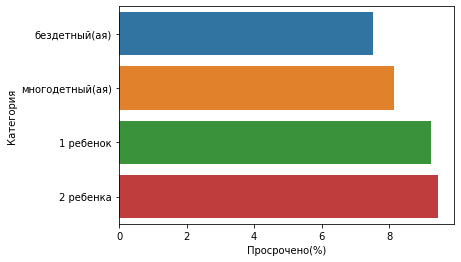

In [25]:
import seaborn as sns
plot = sns.barplot(data=debt_by_children, x='Просрочено(%)', y='Категория')

Долю каждой группы в общей массе заемщиков покажем на круговой диаграмме.

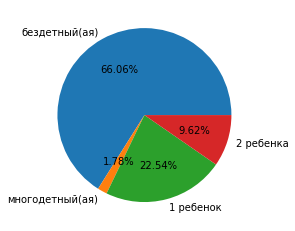

In [26]:
import matplotlib.pyplot as plt
plt.pie(debt_by_children['Займов(шт)'], labels=debt_by_children['Категория'], autopct='%.2f%%')
plt.show()

**Вывод:**  
Бездетная группа показывает минимальный процент просроченных кредитов (7.54%), составляя при этом основную массу заемщиков (66,06%). Максимальный процент просроченных кредитов (9.45%) - в группе с 2 детьми (9.62% от всех заемщиков). Между ними (в порядке возрастания процента просроченных кредитов) располагаются группы "многодетный(ая)" и "1 ребенок" (8.16% и 9.23% соответственно).  
Разница максимального (в группе с 2 детьми) и минимального (в бездетной группе) процента просроченных кредитов составляет всего 1.91%. Т.о., влияние количества детей на возврат кредита в срок сложно назвать существенным. Иначе говоря, заемщики с разным количеством детей имеют почти одинаковый процент просроченных кредитов. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Визуализируем данные о заемщиках в форме таблицы.

In [27]:
debt_by_family_status = prepare_dataset(data, 'family_status', 'Статус')
debt_by_family_status

,Статус,Займов(шт),Просрочено(%)
0,вдовец / вдова,951,6.62
1,в разводе,1189,7.06
2,женат / замужем,12261,7.56
3,гражданский брак,4134,9.31
4,Не женат / не замужем,2796,9.76


 Соответствие семейного статуса проценту просроченных займов покажем на столбчатой диаграмме.

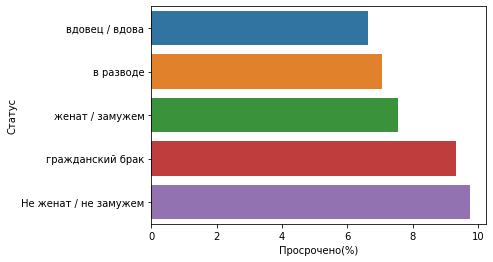

In [28]:
plot = sns.barplot(data=debt_by_family_status, x='Просрочено(%)', y='Статус')

Долю каждой группы в общей массе заемщиков покажем на круговой диаграмме.

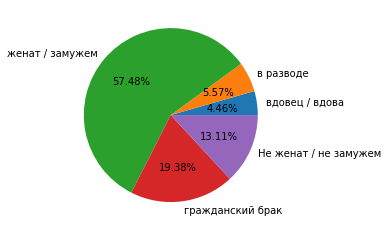

In [29]:
plt.pie(debt_by_family_status['Займов(шт)'], labels=debt_by_family_status['Статус'], autopct='%.2f%%')
plt.show()

**Вывод**  
Заемщики, состоящие или состоявшие в официальном браке (группы "вдовец / вдова", "в разводе", "женат / замужем"), показывают более низкий процент просроченных кредитов (6.62%, 7.06%, 7.56% соответственно). Разница по этому показателю между группами не превышает 1%. Также заемщики этих групп составляют большинство (67.51%).  

Заемщики, не состоявшие в официальном браке (группы "гражданский брак" и "не женат / не замужем"), показывают более выоский процент просроченных кредитов (9.31% и 9.76% соответственно) и практически не отличаются по данному показателю. Данные группы составляют значимые доли среди всех заемщиков: 19.38% и 13.11% соответственно.  

Разница между максимальным (в группе "не женат / не замужем") и минимальным (в группе "вдовец / вдова") процентом просроченных кредитов составляет 3.14%. Т.о., можно сказать что в сравнении и количеством детей, семейный статус заемщика оказывает более заметное влияние на возврат кредитов в срок. Однако, по-прежнему сложно назвать такое влияние сильным.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Визуализируем данные о заемщиках в форме таблицы.

In [30]:
debt_by_income_cat = prepare_dataset(data, 'total_income_category', 'Категория')
debt_by_income_cat

,Категория,Займов(шт),Просрочено(%)
0,D,349,6.02
1,B,5014,7.06
2,A,25,8.00
3,C,15921,8.50
4,E,22,9.09


Количество наблюдений в группах заемщиков "A" и "E" (25 и 22 соответственно) мало, общая доля этих групп не превышает 1%. Вероятно, собрав доплнительную статистику для данных групп, мы сможем учесть их в исследовании. До тех пор переформулируем категории заемщиков следующим образом: "A (более 500000)", "B (до 500000)", "C (до 200000)", "D (до 50000)". 

Для этого переопределим функцию `categorize_income` и применим ее к данным.

In [31]:
def categorize_income(income):
    try:
        if 0 <= income <= 50000:
            return 'D (до 50000)'
        elif 50001 <= income <= 200000:
            return 'C (до 200000)'
        elif 200001 <= income <= 500000:
            return 'B (до 500000)'
        elif income >= 500001:
            return 'A (более 500000)'
    except:
        pass
data['total_income_category'] = data['total_income'].apply(categorize_income)
debt_by_income_cat = prepare_dataset(data, 'total_income_category', 'Категория')
debt_by_income_cat

,Категория,Займов(шт),Просрочено(%)
0,D (до 50000),371,6.20
1,A (более 500000),222,6.31
2,B (до 500000),4817,7.10
3,C (до 200000),15921,8.50


 Соответствие категории дохода проценту просроченных займов покажем на столбчатой диаграмме.

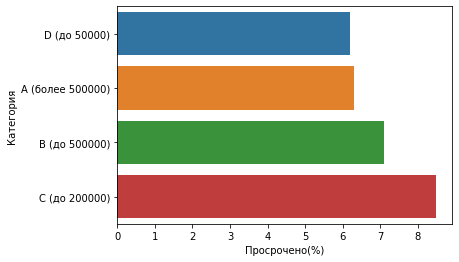

In [32]:
plot = sns.barplot(data=debt_by_income_cat, x='Просрочено(%)', y='Категория')

Долю каждой группы в общей массе заемщиков покажем на круговой диаграмме.

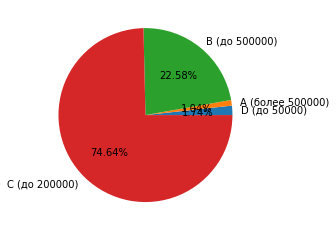

In [33]:
plt.pie(debt_by_income_cat['Займов(шт)'], labels=debt_by_income_cat['Категория'], autopct='%.2f%%')
plt.show()

**Вывод**  
Наименее обеспеченные (группа "D (до 50000)") и наиболее обеспеченные (группа "A (более 500000)") заемщики показывают самый низкий процент просроченных кредитов (6.20% и 6.31% соответственно), составляя при этом минималные доли среди общего числа заемщиков (1.74% и 1.04% соответственно). 

Основная масса заемщиков (группа C "(до 200000)", 74.64%) имеет максимальный процент просроченных кредитов: 8.50%.  

Группа "B (до 500000)", вторая по численности (22.58% от всех заемщиков), показывает средний процент просроченных кредитов: 7.10%.  

Разница между максимальным (группа C "(до 200000)") и минимальным (группа "D (до 50000)") процентом просроченных кредитов составляет 2.3%. Т.о., зависимость между уровнем дохода и возвратом кредита в срок прослеживается слабо. Иначе говоря, заемщики с самым разным доходом имеют приблизительно одинаковый шанс просрочить кредит.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Визуализируем данные о заемщиках в форме таблицы.

In [34]:
debt_by_purpose = prepare_dataset(data, 'purpose_category', 'Цель')
debt_by_purpose

,Цель,Займов(шт),Просрочено(%)
0,операции с недвижимостью,10751,7.26
1,проведение свадьбы,2313,7.91
2,получение образования,3988,9.25
3,операции с автомобилем,4279,9.35


 Соответствие цели кредита проценту просроченных займов покажем на столбчатой диаграмме.

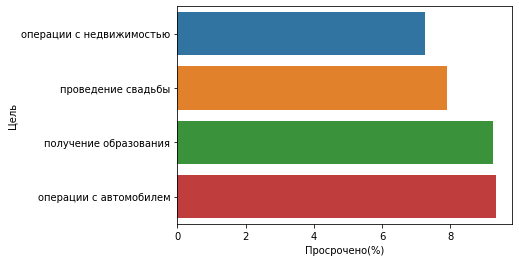

In [35]:
plot = sns.barplot(data=debt_by_purpose, x='Просрочено(%)', y='Цель')

Каждая группа заемщиков составляет значимую долю в общей массе. Покажем это на круговой диаграмме.

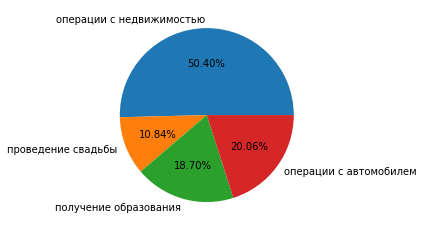

In [36]:
plt.pie(debt_by_purpose['Займов(шт)'], labels=debt_by_purpose['Цель'], autopct='%.2f%%')
plt.show()

**Вывод**  
Заемщики, берущие кредит на операции с недвижимостью или проведение свадьбы, показывают более низкий процент просроченных кредитов (7.26% и 7.91% соответственно) и мало отличаются по данному показателю. При этом займы на операции с недвижимостью составляют большинство (50.40%).  

Заемщики из групп "получение образования" и "операции с автомобилем" имеют больше просроченных кредитов (9.25% и 
9.35% соответственно), практически не отличаясь по данному показателю. Данные группы составляют значимые доли среди всех заемщиков: 18.70% и 20.06% соответственно.  

Разница между максимальным (в группе "операции с автомобилем") и минимальным (в группе "операции с недвижимостью") процентом просроченных кредитов составляет 2.09%. Строго говоря, цель кредита оказывает влияние на его возврат в срок, но такое влияние, по-прежнему, нельзя назвать существенным.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:*  
пропуски наблюдались в столбцах `days_employed` (общий трудовой стаж в днях) и `total_income` (ежемесячный доход). При этом они всегда присутствовали вместе и никогда - по одиночке. Т.е., если `days_employed` = NaN, то и `total_income` = NaN, и наоборот. В датасете было 2174 строки с такими пропусками. Учитывая, что столбец `days_employed` изначально был заполнен аномальными значениями (см. п.2.2 исследования), можно предположить ошибку обработки данных на этапе выгрузки.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:*  
в наборах количественных переменных часто встречаются несколько экземпляров с экстремально низикими или высокими значениями. При расчете среднего арифметического такие экземпляры значительно смещают его вниз или вверх соответственно. Медианное же значение делит весь набор переменных на две равновесные части, и, в этом смысле, является меньшим из зол.

### Шаг 4: общий вывод.

В данном исследовании мы определяли влияние характеристик заемщиков (количества детей, семейного положения, уровня дохода и цели получения кредита) на возврат кредита в срок. Для оценки использовали процент просроченных кредитов и разницу между максимальным и минимальным процентом просроченных кредитов, рассчитанные для разных групп заемщиков в рамках одной характеристики (например, уровня дохода).

Разница между максимальным и минимальным процентом просроченных кредитов для заемщиков, сгруппированных по: 
 - количеству детей - 1.91%
 - цели кредитования - 2.09%
 - уровню дохода - 2.3%
 - семейному положению - 3.14%
 
Чем больше разница между максимальным и минимальным процентом просроченных кредитов в рамках одной характеристики заемщиков, тем сильнее эта характеристика влияет на возврат кредита в срок. Как видно, на фоне прочих характеристик, семейное положение больше влияет на возврат кредита в срок. Однако, можно ли назвать такое влияние существенным? Попробуем оценить разницу между максимальным и минимальным процентом просроченных кредитов, сгруппировав заемщиков по оставшимся характеристикам. 

**Образованию**

In [37]:
display(prepare_dataset(data, 'education', 'Образование').sort_values('Просрочено(%)'))

,Образование,Займов(шт),Просрочено(%)
0,ученая степень,6,0.00
1,высшее,5227,5.32
2,среднее,15075,8.99
3,неоконченное высшее,741,9.18
4,начальное,282,10.99


Отбросив категорию "ученая степень" в виду малого количества наблюдений, получим разницу между максимальным и минимальным процентом просроченных кредитов 5.67%.

**Типу занятости**

In [38]:
display(prepare_dataset(data, 'income_type', 'Занятость').sort_values('Просрочено(%)'))

,Занятость,Займов(шт),Просрочено(%)
0,предприниматель,2,0.00
1,студент,1,0.00
2,пенсионер,3812,5.67
3,госслужащий,1451,5.93
4,компаньон,5047,7.41
5,сотрудник,11015,9.57
6,безработный,2,50.00
7,в декрете,1,100.00


Отбросив категории "предприниматель", "студент", "безработный" и "в декрете" в виду малого количества наблюдений, получим разницу между максимальным и минимальным процентом просроченных кредитов 3.9%.

**Полу**

In [39]:
display(prepare_dataset(data, 'gender', 'Пол').sort_values('Просрочено(%)'))

,Пол,Займов(шт),Просрочено(%)
0,XNA,1,0.00
1,F,14092,7.02
2,M,7238,10.27


Отбросив категорию "XNA" в виду малого количества наблюдений, получим разницу между максимальным и минимальным процентом просроченных кредитов 3.25%.

Дополним список новыми данными. Разница между максимальным и минимальным процентом просроченных кредитов для заемщиков, сгруппированных по:
 - количеству детей - 1.91%
 - цели кредитования - 2.09%
 - уровню дохода - 2.3%
 - семейному положению - 3.14%
 - полу - 3.25%
 - типу занятости - 3.9%
 - образованию - 5.67%   

Быстрый анализ показал, что пол, тип занятости и образование оказывают большее влияние на возврат кредита в срок, чем рассмотренные ранее категории. Влияние уровня образования можно назвать существенным: заемщики с начальным образованием допускают просрочку кредита на 5.67% чаще, чем заемщики с высшим образованием.